## Mohar's Matrix
Given a directed graph $X$, define 
\begin{equation*}
{\cal H}=\sum_{(u,v) \text{ is an arc}} \left( \frac{1}{4} \sigma_X^u\sigma_X^v + \frac{1}{4} \sigma_Y^u\sigma_Y^v+ \frac{\sqrt{3}}{4} \sigma_X^u\sigma_Y^v - \frac{\sqrt{3}}{4} \sigma_Y^u\sigma_X^v\right).
\end{equation*}
Show that ${\cal H}$ is the Mohar matrix of $X$ when it is restricted to the one-excitation subspace.

Mohar's matrix is a generalized adjacency matrix which uses $\omega = (1 + \sqrt{3}i)/2$.
<!-- $$M_{kl} = \begin{cases}
    \omega & k \to l \\
     \bar{\omega} & l \to k \\
     1 & l \leftrightarrow k \\
     0 & \text{otherwise}
\end{cases}$$ -->

**Examples**

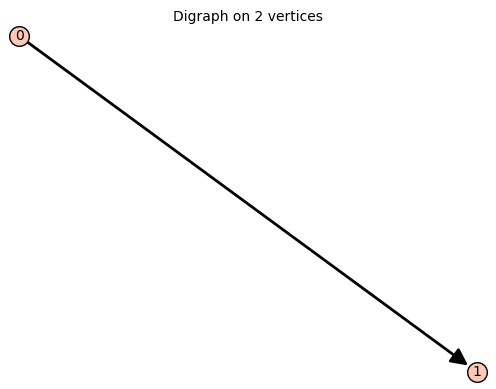

In [1]:
DiGraph(matrix([[0,1],[0,0]]))

Adjacency matrix
$$X = \begin{pmatrix}
    0 & i \\
    -i & 0
\end{pmatrix}$$

Mohar's Matrix
$$M = \begin{pmatrix}
    0 & \omega \\
    \bar{\omega} & 0
\end{pmatrix}$$

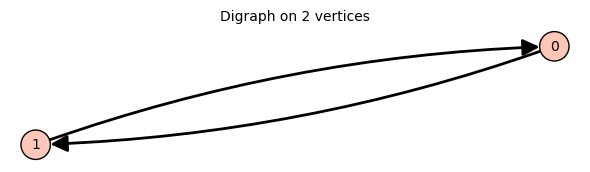

In [2]:
DiGraph(matrix([[0,1],[1,0]]))

Adjacency matrix
$$X = \begin{pmatrix}
    0 & i \\
    -i & 0
\end{pmatrix}$$

Mohar's Matrix
$$M = \begin{pmatrix}
    0 & \omega + \bar{\omega} \\
    \bar{\omega} + \omega & 0
\end{pmatrix} = \begin{pmatrix}
    0 & 1 \\
    1 & 0
\end{pmatrix}$$

In [3]:
################################################################################
# Function: sxyu                                                               #
#                                                                              #
# Purpose: calculate sigma_x^u or sigma_y^u                                    #
#                                                                              #
# Arguments:                                                                   #
#   u        integer     index for Pauli matrix                                # 
#   n        integer     total number of matrices                              # 
#   s        character   x or y to choose Pauli matrix                         # 
#                                                                              #
# Returns: matrix sigma_s^u                                                    #
#                                                                              #
################################################################################

def sxyu(u,n,s):
    # Sanity check
    if u > n-1:
        print("Invalid input: u > n-1")
        return
    # Pauli matrices
    SX = matrix([[0,1],[1,0]])
    SY = matrix([[0,-I],[I,0]])
    # Identity
    I2 = matrix([[1,0],[0,1]])
    # Choose which Pauli matrix to use
    S = SX if s == 'x' else SY
    # Compute tensor products
    j = 1
    if u == 0:
        M = S
        while j < n:
            M = M.tensor_product(I2)
            j += 1
    else:
        M = I2
        j = j + 1
        while j <= u:
            M = M.tensor_product(I2)
            j += 1
        M = M.tensor_product(S)
        while j < n:
            M = M.tensor_product(I2)
            j += j
    return M

In [4]:
import numpy as np

################################################################################
# Function: Hsum                                                               #
#                                                                              #
# Purpose: find Heisenberg type Hamiltonian as part of building Mohar's matrix #
#                                                                              #
# Arguments:                                                                   #
#   A        sage or numpy matrix     adjacency matrix for digraph             # 
#                                     A[i][j] = 1 if arc i to j, 0 otherwise   #
#                                                                              #
# Returns: H = \sum_{(u,v) is an arc}} (1/4 \sigma_X^u\sigma_X^v +             # 
#                                       1/4 \sigma_Y^u\sigma_Y^v +             #
#                                       \sqrt{3}/4 \sigma_X^u\sigma_Y^v -      #
#                                       \sqrt{3}/4 \sigma_Y^u\sigma_X^v)       #
#                                                                              #
################################################################################

def Hsum(A):
    A = np.matrix(A)
    # Find arcs in directed graph
    arcs = list(zip(np.where(A == 1)[0],np.where(A == 1)[1]))
    # Size of matrix
    n = len(A)
    # Initialize H
    H = matrix(2**n,2**n,0)
    # Compute sum
    for arc in arcs:
        u = arc[0]
        v = arc[1]
        H = H + 1/4*sxyu(u,n,'x')*sxyu(v,n,'x') + 1/4*sxyu(u,n,'y')*sxyu(v,n,'y') + \
             sqrt(3)/4*sxyu(u,n,'x')*sxyu(v,2,'y') - sqrt(3)/4*sxyu(u,n,'y')*sxyu(v,2,'x')
    return H

In [5]:
################################################################################
# Function: one_sub                                                            #
#                                                                              #
# Purpose: reduce Hamiltonian to one-excitation subspace                       #
#                                                                              #
# Arguments:                                                                   #
#   H        sage matrix     Hamiltonian                                       # 
#                                                                              #
# Returns: Hamiltonian with all but one excitation rows and columns deleted    #
#                                                                              #
################################################################################

def one_sub(H):
    # Size of matrix
    n = H.nrows()
    # Initialize list of rows/cols to delte
    nums = []
    # Find all rows/cols to delete
    for j in range(n):
        # If power of 2 skip, else add to list
        if (j & (j-1) == 0) and j != 0:
            continue
        else:
            nums.append(j)
    # Delete rows/cols
    M = H.delete_rows(nums)
    M = M.delete_columns(nums)
    return M

In [6]:
################################################################################
# Function: Mohars                                                             #
#                                                                              #
# Purpose: find Mohar's matrix                                                 #
#                                                                              #
# Arguments:                                                                   #
#   A        sage or numpy matrix     adjacency matrix for digraph             # 
#                                     A[i][j] = 1 if arc i to j, 0 otherwise   #
#                                                                              #
# Returns: Mohar's matrix                                                      #
#                                                                              #
################################################################################

def Mohars(A):
    H = Hsum(A)
    return one_sub(H)

**Examples Continued**

In [7]:
A = matrix([[0,1],[0,0]])
Mohars(A)

[                   0  1/2*I*sqrt(3) + 1/2]
[-1/2*I*sqrt(3) + 1/2                    0]

In [8]:
A = matrix([[0,1],[1,0]])
Mohars(A)

[0 1]
[1 0]

### Adjacency Matrix Functions

In [2]:
# %load adj_functions.sage
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(-I*t*evals[i])*idems[i]
    return U
#     A = matrix(A)
#     return matrix(exp(-1*I*t*A))

################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()
    
################################################################################
# Function: parallel                                                           #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are parallel                               #
#                                                                              #
################################################################################

def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True
    
################################################################################
# Function: cospec                                                             #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are cospectral                             #
#                                                                              #
################################################################################

def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
            return False
    return True

################################################################################
# Function: strcospec                                                          #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are strongly cospectral                    #
#                                                                              #
################################################################################

def strcospec(a,b,idems):
    if cospec(a,b,idems) and parallel(a,b,idems):
        return True
    return False